In [1]:
import nibabel as nib
import numpy as np
from nilearn.masking import compute_epi_mask, compute_background_mask, compute_gray_matter_mask
from nilearn import plotting
import matplotlib.pyplot as plt
import SimpleITK as sitk
import glob, os
import numpy.ma as ma
import sys
import normalizationModule
import subprocess
import pdb
%matplotlib inline


In [2]:
num_input = 5
root_path = "./"
train_path = "datalist/train_list.txt"
train_file = open(train_path, 'r')
train_dir = train_file.readlines()

In [3]:
cut_coords = (-140, -120, 80)

def original_code():
    testf = open('./data_preprocessing/generate_mask/test.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/5)):
        print(i)
        direct,_ = test_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask-test.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask-test.nii.gz", cut_coords=cut_coords)
        plotting.show()
        print("showing mask from given subset of dataset")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
# original_code()
        

def generate_mask(filepath):
    im = nib.load(filepath).get_data()
#     print(im.shape)
    im = np.expand_dims(im, axis=0)
#     print(im.shape)
    images = np.concatenate((im, im, im, im), axis=0)
    
    image = np.max(images, axis=0)
#     image = np.swapaxes(image, 0, 2)
    image[image>0] =1
    image = image.astype(dtype=np.uint8)
    print(image.shape)
    image = sitk.GetImageFromArray(image)
    sitk.WriteImage(image, "test-mask.nii.gz")
    plotting.plot_img("test-mask.nii.gz")
    
def stack_images_and_generate_mask():
    for i in range(int(len(train_dir)/5)):
        print(i)
        direct,_ = train_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = train_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = train_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = train_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        print(image.shape)
#         im = nib.load('./'+direct+'.gz')#.get_data()
#         mask = ma.masked_where(im > 0, im)# compute_background_mask(image, border_size=1)
#         mask = compute_background_mask(im, border_size=1)
#         plotting.plot_img(compute_background_mask(im, border_size=1))
#         return
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, "test-image.nii.gz")
        im_nifti = nib.load("test-image.nii.gz")
#         mask = compute_background_mask(im_nifti, border_size=1)
#         mask = sitk.GetImageFromArray(mask)
        
#         print(im_nifti.type)
#         print(mask.type)
#         plotting.plot_img(mask)
        plotting.plot_img(im_nifti)
        plotting.show()
#         return
#         sitk.WriteImage(mask, "test-mask.nii.gz")
#         plotting.plot_img("test-mask.nii.gz")
#         plotting.show()
#         break
#         return
# stack_images_and_generate_mask()
def visualize_masks():
    for idx in range(len(train_dir)):
        for i in range(num_input):
            if i < num_input - 1:
            
                direct, _ = train_dir[num_input * idx + i].split("\n")
                image = nib.load(root_path + direct + '.gz').get_data()

                if i == 0:

#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")
#                     print("showing mask from code")

                    print("showing original mask")
                    plotting.plot_img(root_path + direct + "/mask.nii.gz", cut_coords=cut_coords)

#                     mask = nib.load(root_path + direct + "/mask.nii.gz").get_data()
    #                 plt.show(mask)
#                     print(mask.shape)
#                     print(root_path + direct + '.gz')
                    mask_image1 = compute_epi_mask(root_path + direct + '.gz')
                    print("showing epi mask")
                    plotting.plot_img(mask_image1)
                    mask_image2 = compute_background_mask(root_path + direct + '.gz', border_size=0)
                    print("showing background mask")
                    plotting.plot_img(mask_image2, cut_coords=cut_coords)
#                     mask_image3 = compute_gray_matter_mask(root_path + direct + '.gz')
#                     plotting.plot_img(mask_image3)
#                     newmask = generate_mask(root_path + direct + '.gz')
                    plotting.show()
#                     print("showing new mask")
# #                     mask = nib.load(root_path + direct + "/mask-test.nii.gz").get_data()
#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")

    #                 print(mask.shape)
                
                    break
                break
            break
# def generate_mask(fpath):
    
# visualize_masks()



In [48]:

# there should be 881 HGG file names and 216 LGG file names (if not including "3more" files)
# else we expect 1100 HGG file names and 270 LGG file names
def write_files_to_list_mha():
    HGG_directory = "/data2/brats2015/BRATS2015_Training/HGG"
    LGG_directory = "/data2/brats2015/BRATS2015_Training/LGG"
    HGG_dirs = next(os.walk(HGG_directory))[1]
    LGG_dirs = next(os.walk(LGG_directory))[1]
    f = open("brats2015mha_list.txt", "w")
    HGG_count = 0
    for d in sorted(HGG_dirs):
        full_path = HGG_directory + "/" +  d
        print(full_path)
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
#             print(brain_path)
    #         print(next(os.walk(brain_path)))
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha'):# and 'more' not in b:
#                     print(brain_path+"/"+b)

                    f.write(brain_path + "/" + b + "\n")
                    HGG_count += 1
    LGG_count = 0
    for d in sorted(LGG_dirs):
        full_path = LGG_directory + "/" +  d
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha'):# and 'more' not in b:
#                     print(brain_path+"/"+b)
                    f.write(brain_path + "/" + b + "\n")
                    LGG_count += 1
    print("wrote %d HGG file names and %d LGG file names" % (HGG_count, LGG_count))
    f.close()
    #         for file in os.walk((full_path + "/" + p + "*.mha"):
    #             print(file)
# write_files_to_list_mha()

def write_files_to_list_nii():
    mha_f = open('test_brats2015mha_list.txt', 'r')
    mha_files = mha_f.readlines()
    mha_f.close()
#     assert len(mha_files) == 1100 + 270
    
    nii_f = open('test_brats2015nii_list.txt', 'w')
    count = 0
    for i in range(len(mha_files)):
        new_filepath = mha_files[i].replace(".mha", ".nii").replace("brats2015", "brats2015_converted")
        print(new_filepath)
        nii_f.write(new_filepath)
#         print(mha_files[i])
        count += 1
#     assert count == 1100 + 270
    print("count %d" % count)
    nii_f.close()
    print("Done")
write_files_to_list_nii()
        
def convert_to_nii():
    data_mha = open('test_brats2015mha_list.txt', 'r')
    mha_dir = data_mha.readlines()
    data_mha.close()
    print(len(mha_dir))
#     print(mha_dir)
#     data_nii = open('data_nii.txt', 'r')
#     nii_dir = data_nii.readlines()

    for i in range(len(mha_dir)):
#         break
        print(i)
        path, _ = mha_dir[i].split("\n")
        savepath = path.replace(".mha", ".nii.gz").replace("brats2015", "brats2015_converted")
        print(savepath)
        os.makedirs(os.path.dirname(savepath), exist_ok=True)

#         print(savepath)
        img = sitk.ReadImage(path)
        sitk.WriteImage(img, savepath)
    print("done")
# convert_to_nii()



/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193/VSD.Brain.XX.O.MR_Flair.54193.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1.54194/VSD.Brain.XX.O.MR_T1.54194.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1c.54195/VSD.Brain.XX.O.MR_T1c.54195.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T2.54196/VSD.Brain.XX.O.MR_T2.54196.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_Flair.54199/VSD.Brain.XX.O.MR_Flair.54199.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1.54200/VSD.Brain.XX.O.MR_T1.54200.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1c.54201/VSD.Brain.XX.O.MR_T1c.54201.nii

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T2.54202/VSD.Brain.XX.O.MR_T2.54202.nii



In [44]:
def write_test_files_to_list_mha():
    test_directory = "/data2/brats2015/Testing/HGG_LGG"
#     print(next(os.walk(test_directory)))
    test_dirs = next(os.walk(test_directory))[1]
    f = open("test_brats2015mha_list.txt", "w")
    count = 0
    for d in sorted(test_dirs):
        full_path = test_directory + "/" +  d
#         print(full_path)
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
#             print(brain_path)
    #         print(next(os.walk(brain_path)))
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha'):# and 'more' not in b:
                    print(brain_path+"/"+b)

                    f.write(brain_path + "/" + b + "\n")
                    count += 1
   
    print("wrote %d  file names" % (count))
    f.close()
# write_test_files_to_list_mha()

/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193/VSD.Brain.XX.O.MR_Flair.54193.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1.54194/VSD.Brain.XX.O.MR_T1.54194.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1c.54195/VSD.Brain.XX.O.MR_T1c.54195.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T2.54196/VSD.Brain.XX.O.MR_T2.54196.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_Flair.54199/VSD.Brain.XX.O.MR_Flair.54199.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1.54200/VSD.Brain.XX.O.MR_T1.54200.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1c.54201/VSD.Brain.XX.O.MR_T1c.54201.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T2.54202/VSD.Brain.XX.O.MR_T2.54202.mha
/data2/brats2015/Testing/HGG_LGG/brats_2013_pat0109_1/VSD.Brain.XX.O.MR_Flair.54205/VSD.

0
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193/VSD.Brain.XX.O.MR_Flair.54193.nii/mask.nii.gz
showing generated mask


/home/arissa/miniconda3/envs/brats/lib/python3.6/site-packages/nilearn/_utils/niimg.py:41: ResourceWarning: unclosed file <_io.TextIOWrapper name='test_brats2015mha_list.txt' mode='w' encoding='UTF-8'>
  gc.collect()


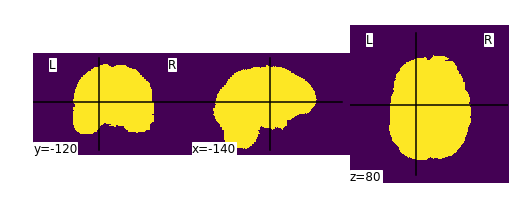

showing mask from given subset of dataset
1
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_Flair.54199/VSD.Brain.XX.O.MR_Flair.54199.nii/mask.nii.gz
showing generated mask


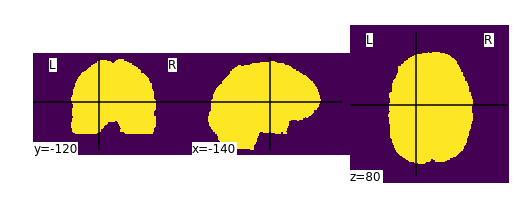

showing mask from given subset of dataset
2
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0109_1/VSD.Brain.XX.O.MR_Flair.54205/VSD.Brain.XX.O.MR_Flair.54205.nii/mask.nii.gz
showing generated mask


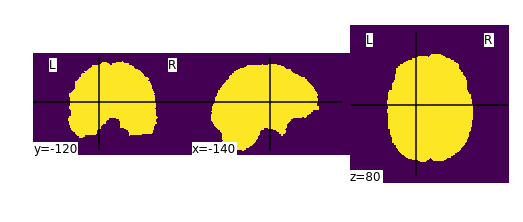

showing mask from given subset of dataset
3
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0116_1/VSD.Brain.XX.O.MR_Flair.54215/VSD.Brain.XX.O.MR_Flair.54215.nii/mask.nii.gz
showing generated mask


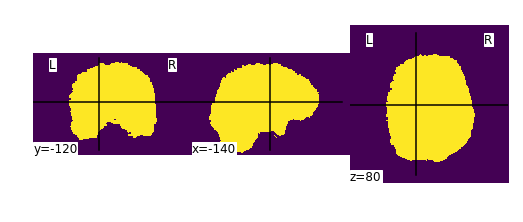

showing mask from given subset of dataset
4
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0117_1/VSD.Brain.XX.O.MR_Flair.54221/VSD.Brain.XX.O.MR_Flair.54221.nii/mask.nii.gz
showing generated mask


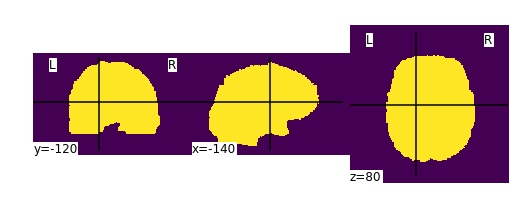

showing mask from given subset of dataset
5
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0119_1/VSD.Brain.XX.O.MR_Flair.54227/VSD.Brain.XX.O.MR_Flair.54227.nii/mask.nii.gz
showing generated mask


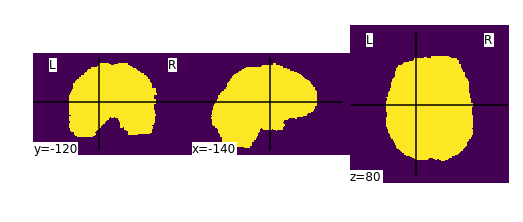

showing mask from given subset of dataset
6
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0120_1/VSD.Brain.XX.O.MR_Flair.54233/VSD.Brain.XX.O.MR_Flair.54233.nii/mask.nii.gz
showing generated mask


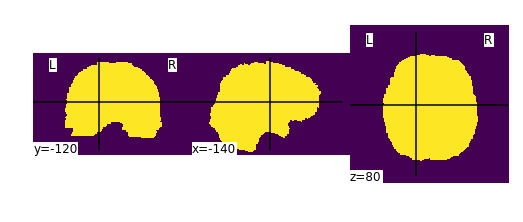

showing mask from given subset of dataset
7
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0130_1/VSD.Brain.XX.O.MR_Flair.54239/VSD.Brain.XX.O.MR_Flair.54239.nii/mask.nii.gz
showing generated mask


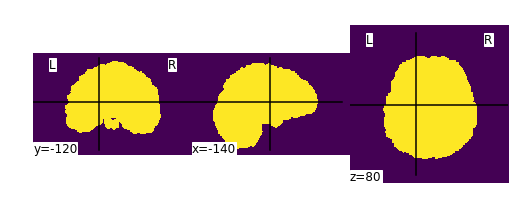

showing mask from given subset of dataset
8
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0131_1/VSD.Brain.XX.O.MR_Flair.54245/VSD.Brain.XX.O.MR_Flair.54245.nii/mask.nii.gz
showing generated mask


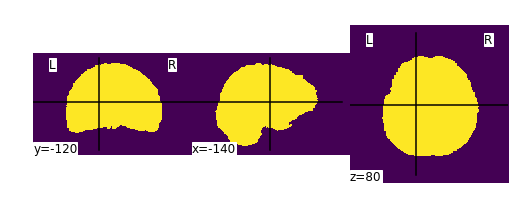

showing mask from given subset of dataset
9
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0133_1/VSD.Brain.XX.O.MR_Flair.54251/VSD.Brain.XX.O.MR_Flair.54251.nii/mask.nii.gz
showing generated mask


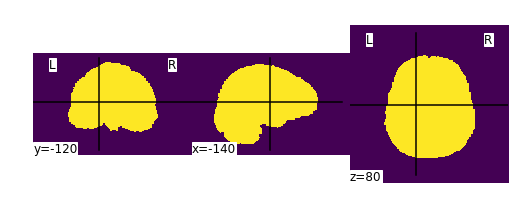

showing mask from given subset of dataset
10
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0134_1/VSD.Brain.XX.O.MR_Flair.54257/VSD.Brain.XX.O.MR_Flair.54257.nii/mask.nii.gz
showing generated mask


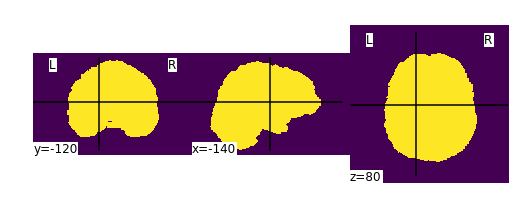

showing mask from given subset of dataset
11
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0135_1/VSD.Brain.XX.O.MR_Flair.54263/VSD.Brain.XX.O.MR_Flair.54263.nii/mask.nii.gz
showing generated mask


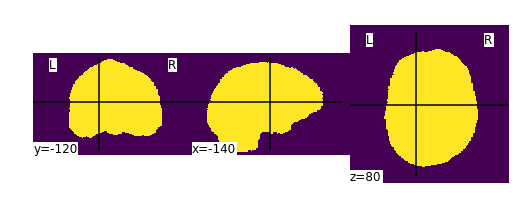

showing mask from given subset of dataset
12
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0136_1/VSD.Brain.XX.O.MR_Flair.54269/VSD.Brain.XX.O.MR_Flair.54269.nii/mask.nii.gz
showing generated mask


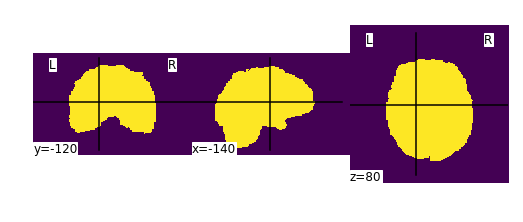

showing mask from given subset of dataset
13
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0137_1/VSD.Brain.XX.O.MR_Flair.54275/VSD.Brain.XX.O.MR_Flair.54275.nii/mask.nii.gz
showing generated mask


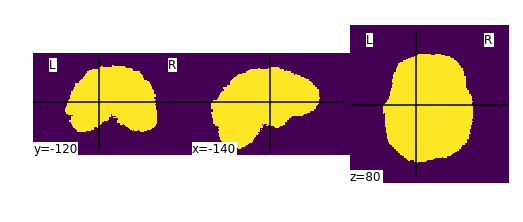

showing mask from given subset of dataset
14
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_patx116_1/VSD.Brain.XX.O.MR_Flair.54281/VSD.Brain.XX.O.MR_Flair.54281.nii/mask.nii.gz
showing generated mask


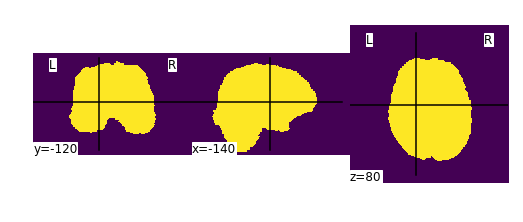

showing mask from given subset of dataset
15
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat114_0001/VSD.Brain.XX.O.MR_Flair.40461/VSD.Brain.XX.O.MR_Flair.40461.nii/mask.nii.gz
showing generated mask


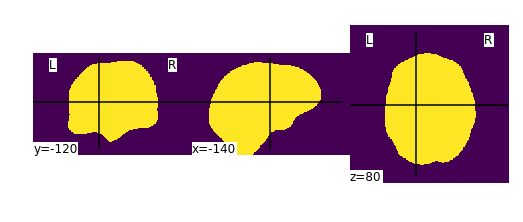

showing mask from given subset of dataset
16
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat114_0053/VSD.Brain.XX.O.MR_Flair.40453/VSD.Brain.XX.O.MR_Flair.40453.nii/mask.nii.gz
showing generated mask


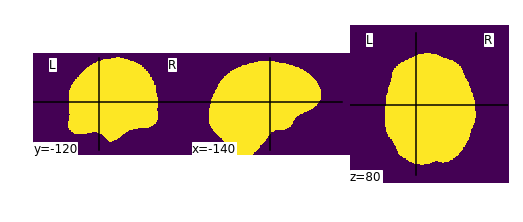

showing mask from given subset of dataset
17
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat114_0087/VSD.Brain.XX.O.MR_Flair.40469/VSD.Brain.XX.O.MR_Flair.40469.nii/mask.nii.gz
showing generated mask


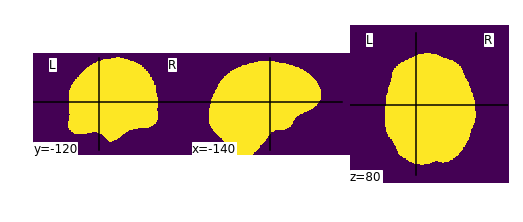

showing mask from given subset of dataset
18
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat114_0115/VSD.Brain.XX.O.MR_Flair.40457/VSD.Brain.XX.O.MR_Flair.40457.nii/mask.nii.gz
showing generated mask


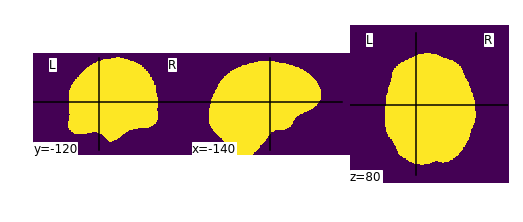

showing mask from given subset of dataset
19
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat114_0149/VSD.Brain.XX.O.MR_Flair.40465/VSD.Brain.XX.O.MR_Flair.40465.nii/mask.nii.gz
showing generated mask


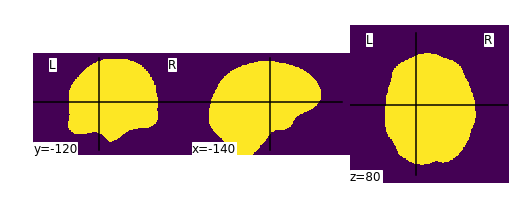

showing mask from given subset of dataset
20
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0001/VSD.Brain.XX.O.MR_Flair.40493/VSD.Brain.XX.O.MR_Flair.40493.nii/mask.nii.gz
showing generated mask


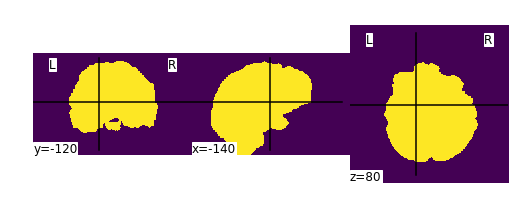

showing mask from given subset of dataset
21
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0054/VSD.Brain.XX.O.MR_Flair.40473/VSD.Brain.XX.O.MR_Flair.40473.nii/mask.nii.gz
showing generated mask


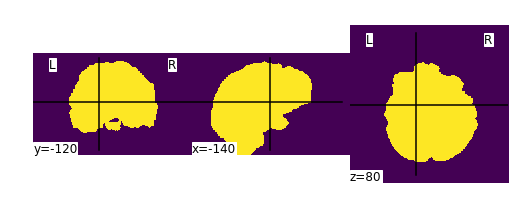

showing mask from given subset of dataset
22
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0083/VSD.Brain.XX.O.MR_Flair.40485/VSD.Brain.XX.O.MR_Flair.40485.nii/mask.nii.gz
showing generated mask


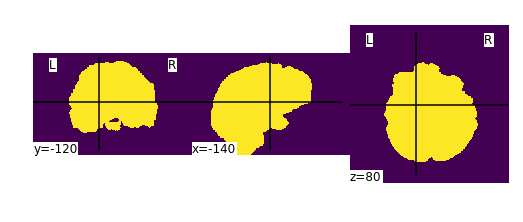

showing mask from given subset of dataset
23
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0116/VSD.Brain.XX.O.MR_Flair.40509/VSD.Brain.XX.O.MR_Flair.40509.nii/mask.nii.gz
showing generated mask


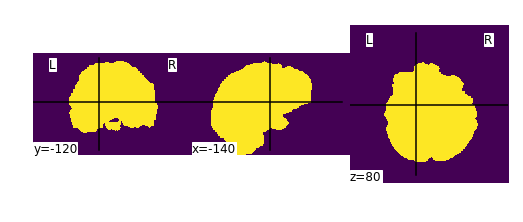

showing mask from given subset of dataset
24
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0193/VSD.Brain.XX.O.MR_Flair.40481/VSD.Brain.XX.O.MR_Flair.40481.nii/mask.nii.gz
showing generated mask


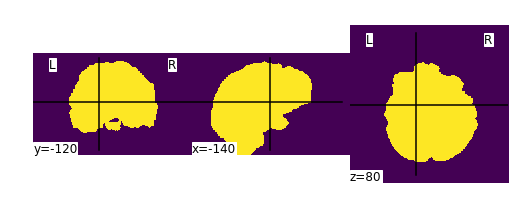

showing mask from given subset of dataset
25
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0254/VSD.Brain.XX.O.MR_Flair.40505/VSD.Brain.XX.O.MR_Flair.40505.nii/mask.nii.gz
showing generated mask


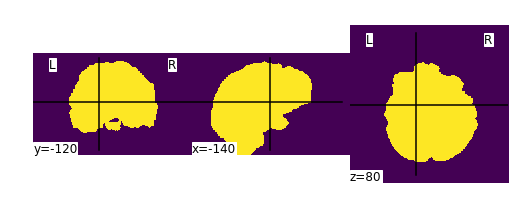

showing mask from given subset of dataset
26
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0322/VSD.Brain.XX.O.MR_Flair.40497/VSD.Brain.XX.O.MR_Flair.40497.nii/mask.nii.gz
showing generated mask


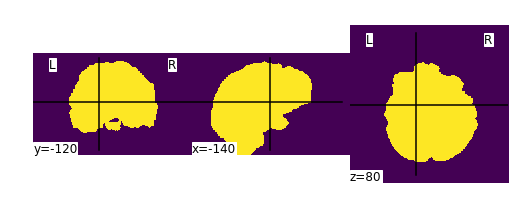

showing mask from given subset of dataset
27
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0335/VSD.Brain.XX.O.MR_Flair.40501/VSD.Brain.XX.O.MR_Flair.40501.nii/mask.nii.gz
showing generated mask


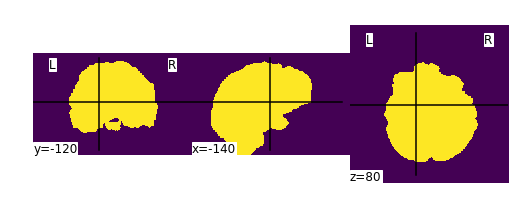

showing mask from given subset of dataset
28
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0360/VSD.Brain.XX.O.MR_Flair.40477/VSD.Brain.XX.O.MR_Flair.40477.nii/mask.nii.gz
showing generated mask


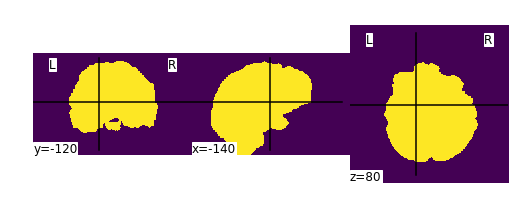

showing mask from given subset of dataset
29
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0435/VSD.Brain.XX.O.MR_Flair.40489/VSD.Brain.XX.O.MR_Flair.40489.nii/mask.nii.gz
showing generated mask


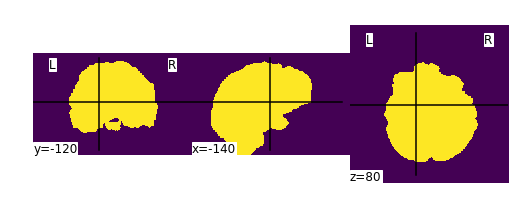

showing mask from given subset of dataset
30
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat123_0558/VSD.Brain.XX.O.MR_Flair.40513/VSD.Brain.XX.O.MR_Flair.40513.nii/mask.nii.gz
showing generated mask


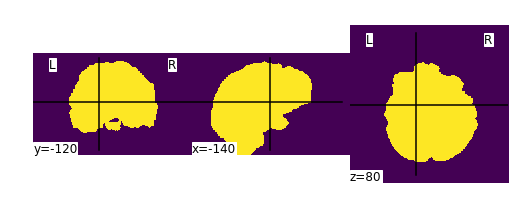

showing mask from given subset of dataset
31
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat127_0001/VSD.Brain.XX.O.MR_Flair.40517/VSD.Brain.XX.O.MR_Flair.40517.nii/mask.nii.gz
showing generated mask


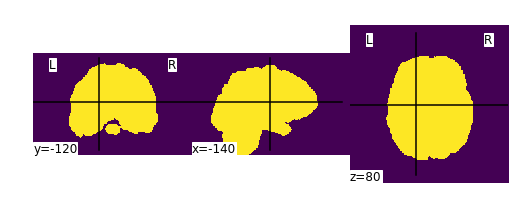

showing mask from given subset of dataset
32
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat139_0159/VSD.Brain.XX.O.MR_Flair.43204/VSD.Brain.XX.O.MR_Flair.43204.nii/mask.nii.gz
showing generated mask


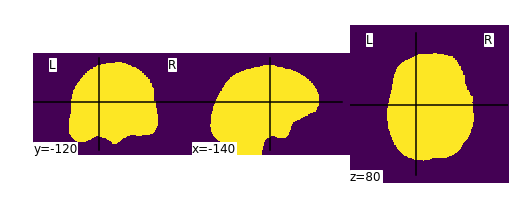

showing mask from given subset of dataset
33
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat146_0001/VSD.Brain.XX.O.MR_Flair.40537/VSD.Brain.XX.O.MR_Flair.40537.nii/mask.nii.gz
showing generated mask


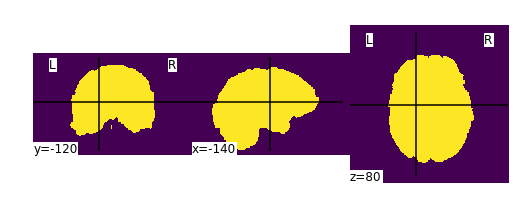

showing mask from given subset of dataset
34
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat148_0001/VSD.Brain.XX.O.MR_Flair.40541/VSD.Brain.XX.O.MR_Flair.40541.nii/mask.nii.gz
showing generated mask


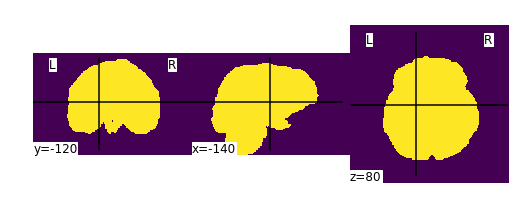

showing mask from given subset of dataset
35
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat166_0001/VSD.Brain.XX.O.MR_Flair.40545/VSD.Brain.XX.O.MR_Flair.40545.nii/mask.nii.gz
showing generated mask


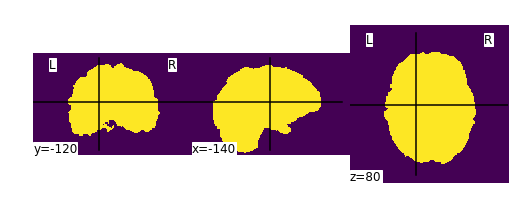

showing mask from given subset of dataset
36
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat172_0001/VSD.Brain.XX.O.MR_Flair.40549/VSD.Brain.XX.O.MR_Flair.40549.nii/mask.nii.gz
showing generated mask


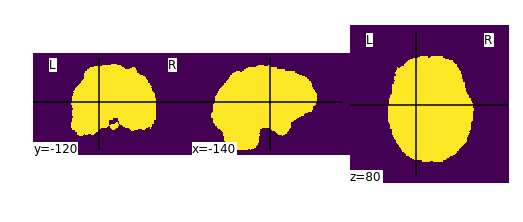

showing mask from given subset of dataset
37
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat174_0001/VSD.Brain.XX.O.MR_Flair.40553/VSD.Brain.XX.O.MR_Flair.40553.nii/mask.nii.gz
showing generated mask


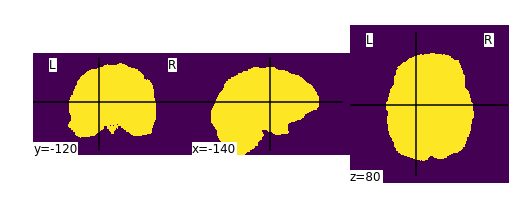

showing mask from given subset of dataset
38
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat210_0001/VSD.Brain.XX.O.MR_Flair.40557/VSD.Brain.XX.O.MR_Flair.40557.nii/mask.nii.gz
showing generated mask


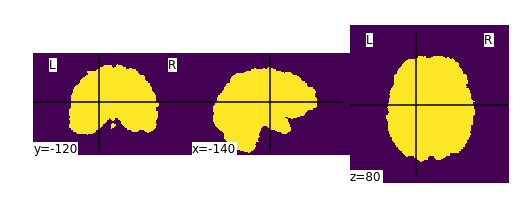

showing mask from given subset of dataset
39
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat220_0001/VSD.Brain.XX.O.MR_Flair.40561/VSD.Brain.XX.O.MR_Flair.40561.nii/mask.nii.gz
showing generated mask


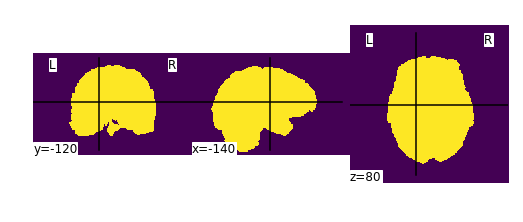

showing mask from given subset of dataset
40
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat225_0001/VSD.Brain.XX.O.MR_Flair.40565/VSD.Brain.XX.O.MR_Flair.40565.nii/mask.nii.gz
showing generated mask


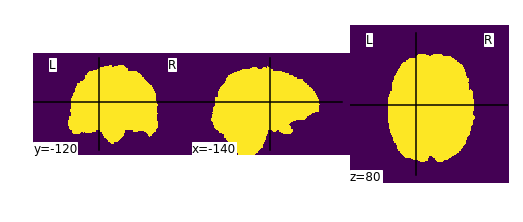

showing mask from given subset of dataset
41
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat229_0001/VSD.Brain.XX.O.MR_Flair.40569/VSD.Brain.XX.O.MR_Flair.40569.nii/mask.nii.gz
showing generated mask


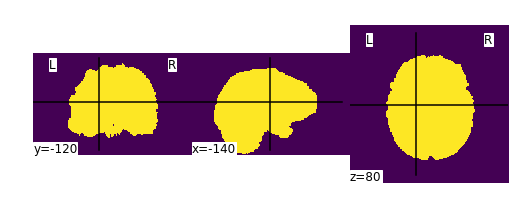

showing mask from given subset of dataset
42
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat232_0001/VSD.Brain.XX.O.MR_Flair.40573/VSD.Brain.XX.O.MR_Flair.40573.nii/mask.nii.gz
showing generated mask


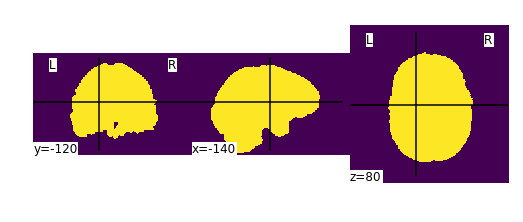

showing mask from given subset of dataset
43
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat236_0001/VSD.Brain.XX.O.MR_Flair.40577/VSD.Brain.XX.O.MR_Flair.40577.nii/mask.nii.gz
showing generated mask


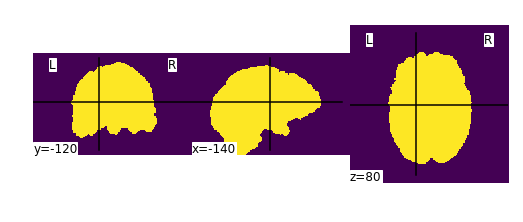

showing mask from given subset of dataset
44
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat239_0001/VSD.Brain.XX.O.MR_Flair.40581/VSD.Brain.XX.O.MR_Flair.40581.nii/mask.nii.gz
showing generated mask


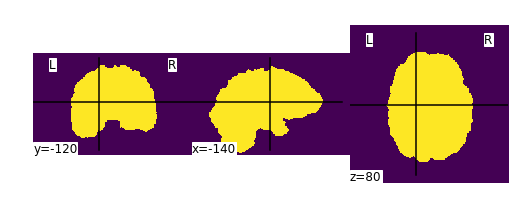

showing mask from given subset of dataset
45
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat244_0001/VSD.Brain.XX.O.MR_Flair.40589/VSD.Brain.XX.O.MR_Flair.40589.nii/mask.nii.gz
showing generated mask


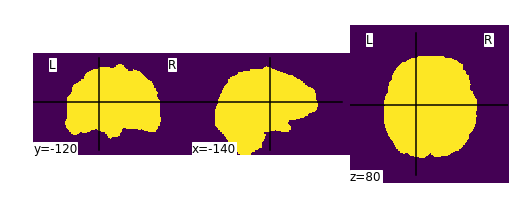

showing mask from given subset of dataset
46
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat244_0157/VSD.Brain.XX.O.MR_Flair.40585/VSD.Brain.XX.O.MR_Flair.40585.nii/mask.nii.gz
showing generated mask


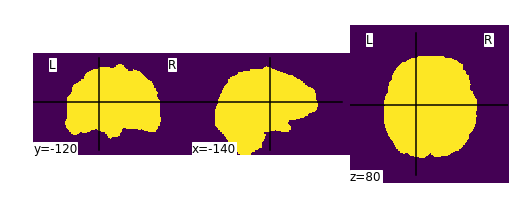

showing mask from given subset of dataset
47
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat244_0281/VSD.Brain.XX.O.MR_Flair.40593/VSD.Brain.XX.O.MR_Flair.40593.nii/mask.nii.gz
showing generated mask


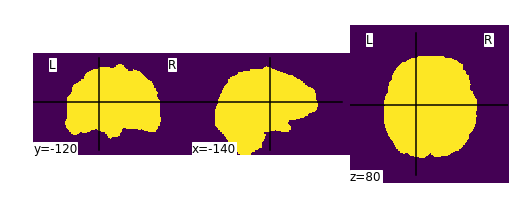

showing mask from given subset of dataset
48
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat263_0001/VSD.Brain.XX.O.MR_Flair.40605/VSD.Brain.XX.O.MR_Flair.40605.nii/mask.nii.gz
showing generated mask


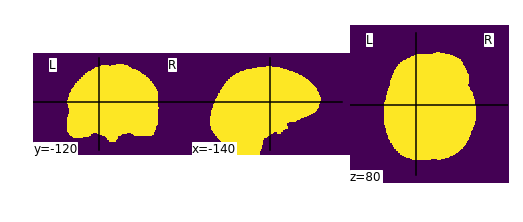

showing mask from given subset of dataset
49
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat263_0060/VSD.Brain.XX.O.MR_Flair.40597/VSD.Brain.XX.O.MR_Flair.40597.nii/mask.nii.gz
showing generated mask


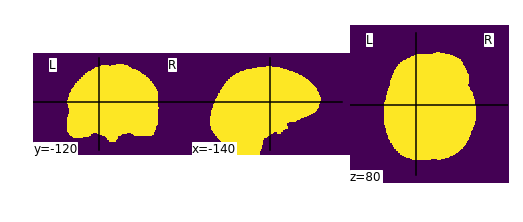

showing mask from given subset of dataset
50
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat263_0115/VSD.Brain.XX.O.MR_Flair.40609/VSD.Brain.XX.O.MR_Flair.40609.nii/mask.nii.gz
showing generated mask


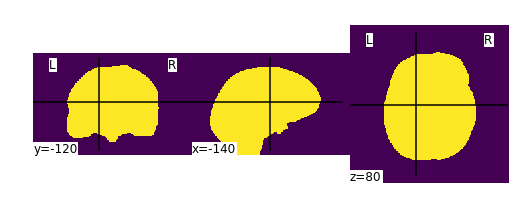

showing mask from given subset of dataset
51
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat263_0170/VSD.Brain.XX.O.MR_Flair.40601/VSD.Brain.XX.O.MR_Flair.40601.nii/mask.nii.gz
showing generated mask


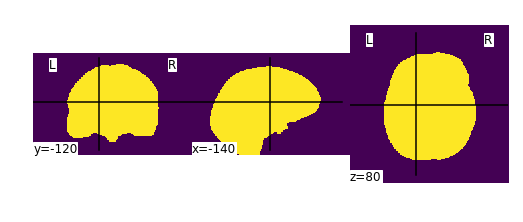

showing mask from given subset of dataset
52
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat263_0199/VSD.Brain.XX.O.MR_Flair.40613/VSD.Brain.XX.O.MR_Flair.40613.nii/mask.nii.gz
showing generated mask


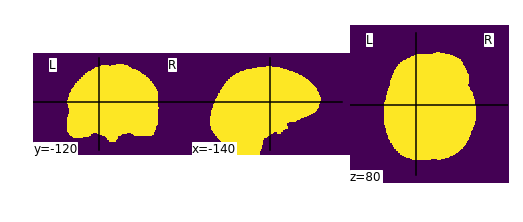

showing mask from given subset of dataset
53
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat271_0001/VSD.Brain.XX.O.MR_Flair.40621/VSD.Brain.XX.O.MR_Flair.40621.nii/mask.nii.gz
showing generated mask


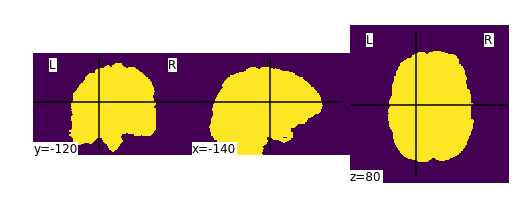

showing mask from given subset of dataset
54
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat273_0001/VSD.Brain.XX.O.MR_Flair.40625/VSD.Brain.XX.O.MR_Flair.40625.nii/mask.nii.gz
showing generated mask


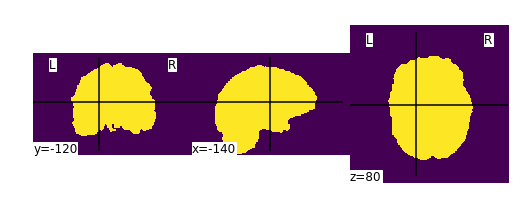

showing mask from given subset of dataset
55
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat294_0001/VSD.Brain.XX.O.MR_Flair.40629/VSD.Brain.XX.O.MR_Flair.40629.nii/mask.nii.gz
showing generated mask


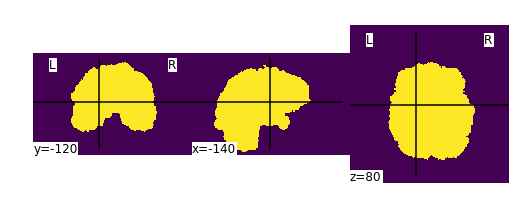

showing mask from given subset of dataset
56
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat337_0019/VSD.Brain.XX.O.MR_Flair.40633/VSD.Brain.XX.O.MR_Flair.40633.nii/mask.nii.gz
showing generated mask


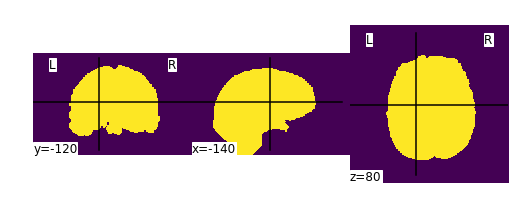

showing mask from given subset of dataset
57
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat348_0002/VSD.Brain.XX.O.MR_Flair.40637/VSD.Brain.XX.O.MR_Flair.40637.nii/mask.nii.gz
showing generated mask


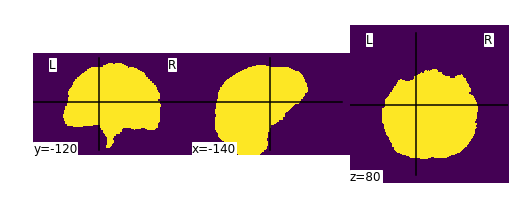

showing mask from given subset of dataset
58
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat352_0001/VSD.Brain.XX.O.MR_Flair.40645/VSD.Brain.XX.O.MR_Flair.40645.nii/mask.nii.gz
showing generated mask


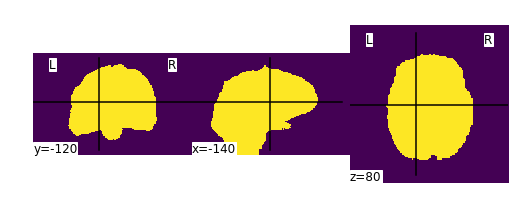

showing mask from given subset of dataset
59
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat352_0114/VSD.Brain.XX.O.MR_Flair.40641/VSD.Brain.XX.O.MR_Flair.40641.nii/mask.nii.gz
showing generated mask


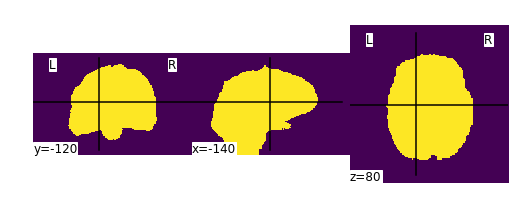

showing mask from given subset of dataset
60
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat359_0001/VSD.Brain.XX.O.MR_Flair.40671/VSD.Brain.XX.O.MR_Flair.40671.nii/mask.nii.gz
showing generated mask


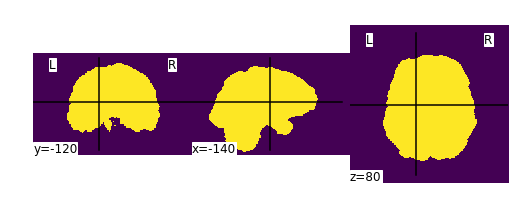

showing mask from given subset of dataset
61
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat381_0001/VSD.Brain.XX.O.MR_Flair.40679/VSD.Brain.XX.O.MR_Flair.40679.nii/mask.nii.gz
showing generated mask


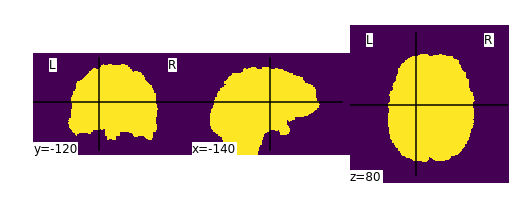

showing mask from given subset of dataset
62
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat383_0001/VSD.Brain.XX.O.MR_Flair.40683/VSD.Brain.XX.O.MR_Flair.40683.nii/mask.nii.gz
showing generated mask


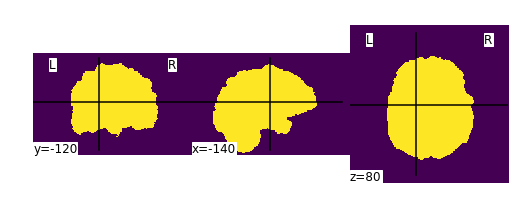

showing mask from given subset of dataset
63
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat384_0001/VSD.Brain.XX.O.MR_Flair.40687/VSD.Brain.XX.O.MR_Flair.40687.nii/mask.nii.gz
showing generated mask


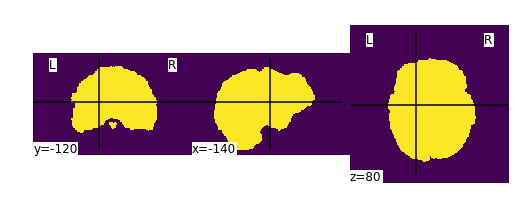

showing mask from given subset of dataset
64
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat385_0001/VSD.Brain.XX.O.MR_Flair.40691/VSD.Brain.XX.O.MR_Flair.40691.nii/mask.nii.gz
showing generated mask


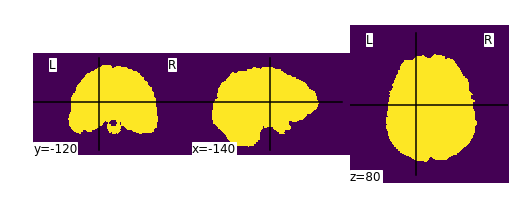

showing mask from given subset of dataset
65
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat454_0001/VSD.Brain.XX.O.MR_Flair.40695/VSD.Brain.XX.O.MR_Flair.40695.nii/mask.nii.gz
showing generated mask


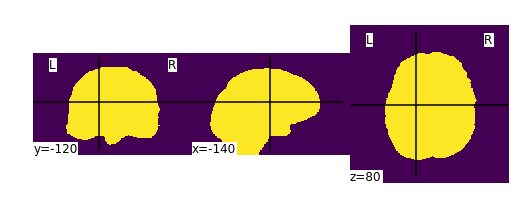

showing mask from given subset of dataset
66
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat456_0001/VSD.Brain.XX.O.MR_Flair.40711/VSD.Brain.XX.O.MR_Flair.40711.nii/mask.nii.gz
showing generated mask


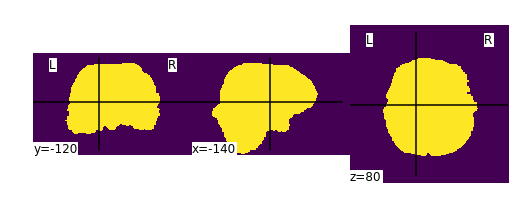

showing mask from given subset of dataset
67
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat456_0043/VSD.Brain.XX.O.MR_Flair.40699/VSD.Brain.XX.O.MR_Flair.40699.nii/mask.nii.gz
showing generated mask


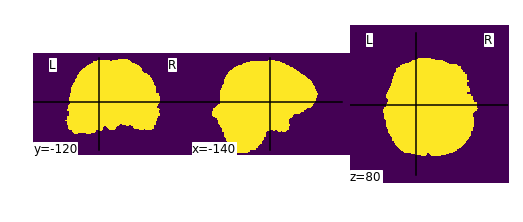

showing mask from given subset of dataset
68
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat456_0112/VSD.Brain.XX.O.MR_Flair.40707/VSD.Brain.XX.O.MR_Flair.40707.nii/mask.nii.gz
showing generated mask


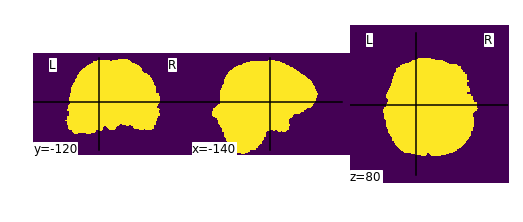

showing mask from given subset of dataset
69
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat456_0127/VSD.Brain.XX.O.MR_Flair.40703/VSD.Brain.XX.O.MR_Flair.40703.nii/mask.nii.gz
showing generated mask


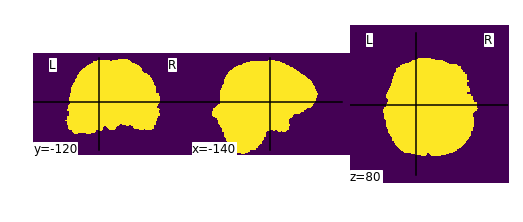

showing mask from given subset of dataset
70
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat456_0216/VSD.Brain.XX.O.MR_Flair.40715/VSD.Brain.XX.O.MR_Flair.40715.nii/mask.nii.gz
showing generated mask


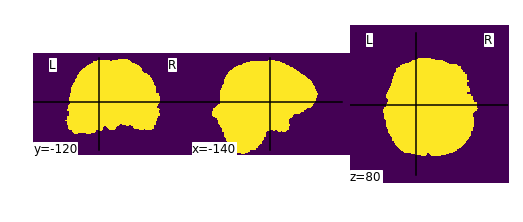

showing mask from given subset of dataset
71
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat457_0079/VSD.Brain.XX.O.MR_Flair.40719/VSD.Brain.XX.O.MR_Flair.40719.nii/mask.nii.gz
showing generated mask


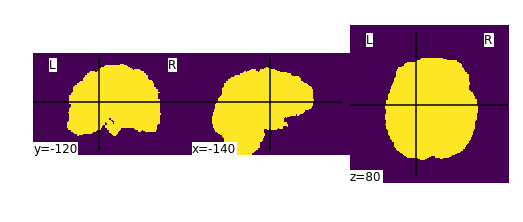

showing mask from given subset of dataset
72
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat457_0231/VSD.Brain.XX.O.MR_Flair.40735/VSD.Brain.XX.O.MR_Flair.40735.nii/mask.nii.gz
showing generated mask


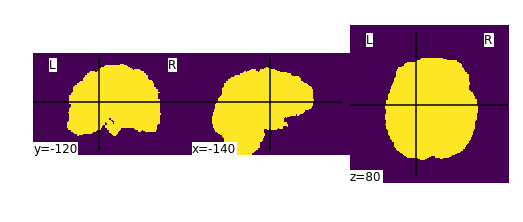

showing mask from given subset of dataset
73
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat457_0371/VSD.Brain.XX.O.MR_Flair.40731/VSD.Brain.XX.O.MR_Flair.40731.nii/mask.nii.gz
showing generated mask


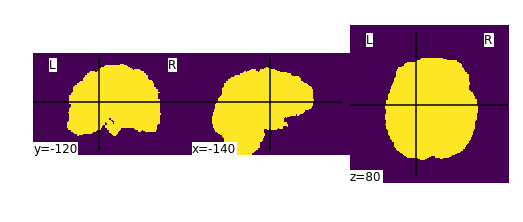

showing mask from given subset of dataset
74
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat464_0001/VSD.Brain.XX.O.MR_Flair.40739/VSD.Brain.XX.O.MR_Flair.40739.nii/mask.nii.gz
showing generated mask


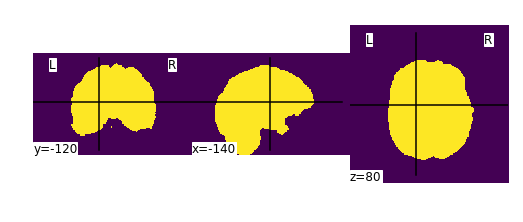

showing mask from given subset of dataset
75
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat467_0001/VSD.Brain.XX.O.MR_Flair.40743/VSD.Brain.XX.O.MR_Flair.40743.nii/mask.nii.gz
showing generated mask


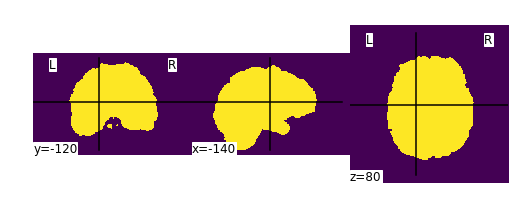

showing mask from given subset of dataset
76
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat476_0001/VSD.Brain.XX.O.MR_Flair.40747/VSD.Brain.XX.O.MR_Flair.40747.nii/mask.nii.gz
showing generated mask


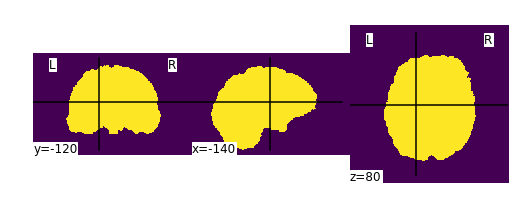

showing mask from given subset of dataset
77
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0001/VSD.Brain.XX.O.MR_Flair.40767/VSD.Brain.XX.O.MR_Flair.40767.nii/mask.nii.gz
showing generated mask


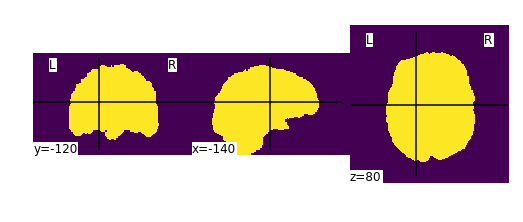

showing mask from given subset of dataset
78
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0004/VSD.Brain.XX.O.MR_Flair.40763/VSD.Brain.XX.O.MR_Flair.40763.nii/mask.nii.gz
showing generated mask


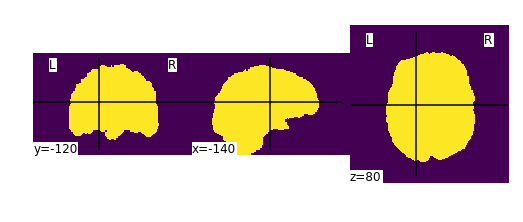

showing mask from given subset of dataset
79
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0071/VSD.Brain.XX.O.MR_Flair.40771/VSD.Brain.XX.O.MR_Flair.40771.nii/mask.nii.gz
showing generated mask


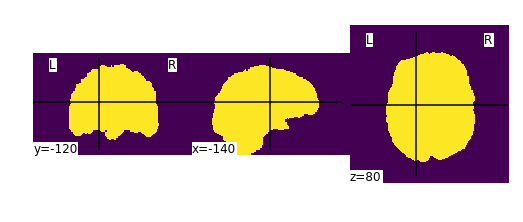

showing mask from given subset of dataset
80
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0093/VSD.Brain.XX.O.MR_Flair.40791/VSD.Brain.XX.O.MR_Flair.40791.nii/mask.nii.gz
showing generated mask


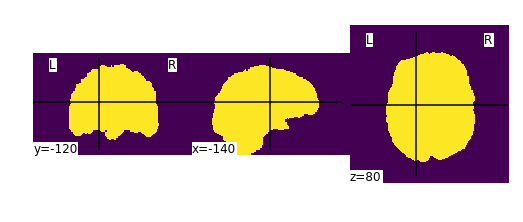

showing mask from given subset of dataset
81
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0152/VSD.Brain.XX.O.MR_Flair.40775/VSD.Brain.XX.O.MR_Flair.40775.nii/mask.nii.gz
showing generated mask


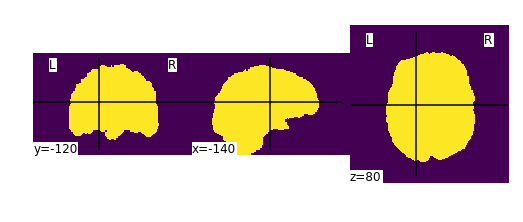

showing mask from given subset of dataset
82
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0214/VSD.Brain.XX.O.MR_Flair.40779/VSD.Brain.XX.O.MR_Flair.40779.nii/mask.nii.gz
showing generated mask


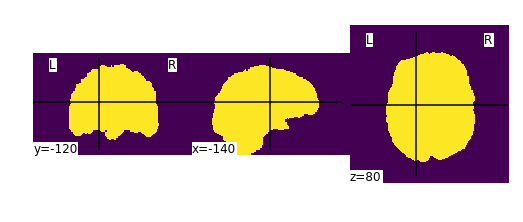

showing mask from given subset of dataset
83
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0275/VSD.Brain.XX.O.MR_Flair.40787/VSD.Brain.XX.O.MR_Flair.40787.nii/mask.nii.gz
showing generated mask


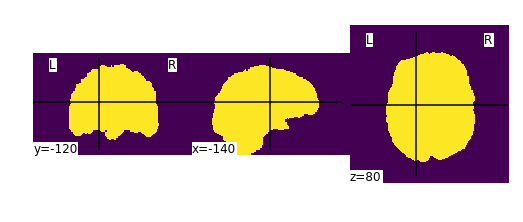

showing mask from given subset of dataset
84
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0345/VSD.Brain.XX.O.MR_Flair.40759/VSD.Brain.XX.O.MR_Flair.40759.nii/mask.nii.gz
showing generated mask


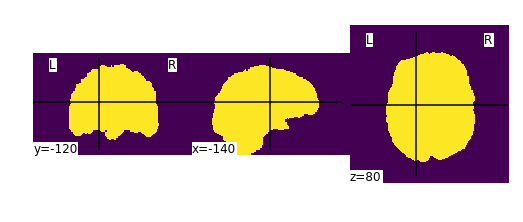

showing mask from given subset of dataset
85
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0386/VSD.Brain.XX.O.MR_Flair.40755/VSD.Brain.XX.O.MR_Flair.40755.nii/mask.nii.gz
showing generated mask


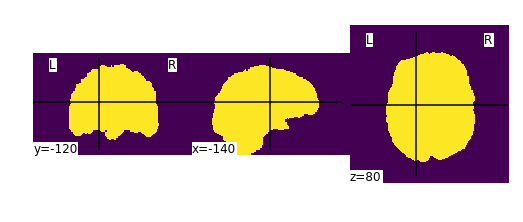

showing mask from given subset of dataset
86
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0427/VSD.Brain.XX.O.MR_Flair.40751/VSD.Brain.XX.O.MR_Flair.40751.nii/mask.nii.gz
showing generated mask


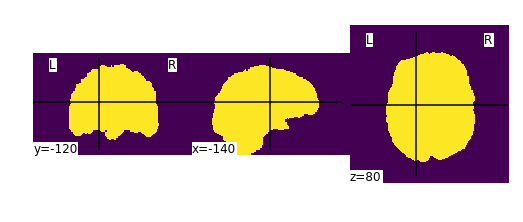

showing mask from given subset of dataset
87
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat484_0458/VSD.Brain.XX.O.MR_Flair.40783/VSD.Brain.XX.O.MR_Flair.40783.nii/mask.nii.gz
showing generated mask


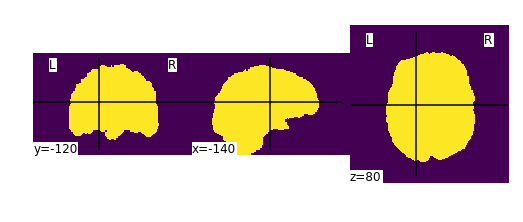

showing mask from given subset of dataset
88
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat496_0001/VSD.Brain.XX.O.MR_Flair.40795/VSD.Brain.XX.O.MR_Flair.40795.nii/mask.nii.gz
showing generated mask


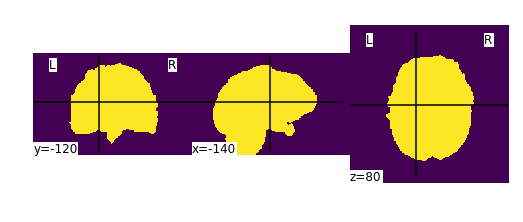

showing mask from given subset of dataset
89
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0002/VSD.Brain.XX.O.MR_Flair.40811/VSD.Brain.XX.O.MR_Flair.40811.nii/mask.nii.gz
showing generated mask


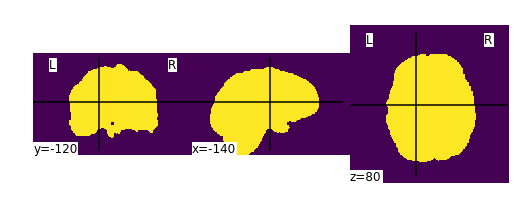

showing mask from given subset of dataset
90
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0028/VSD.Brain.XX.O.MR_Flair.41210/VSD.Brain.XX.O.MR_Flair.41210.nii/mask.nii.gz
showing generated mask


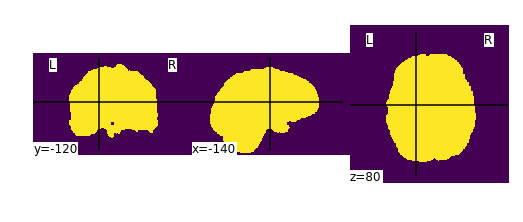

showing mask from given subset of dataset
91
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0030/VSD.Brain.XX.O.MR_Flair.40807/VSD.Brain.XX.O.MR_Flair.40807.nii/mask.nii.gz
showing generated mask


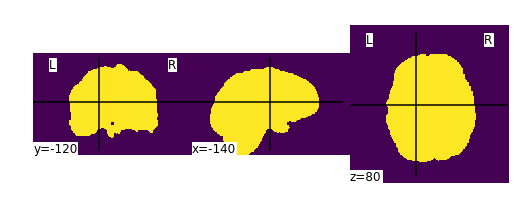

showing mask from given subset of dataset
92
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0067/VSD.Brain.XX.O.MR_Flair.40803/VSD.Brain.XX.O.MR_Flair.40803.nii/mask.nii.gz
showing generated mask


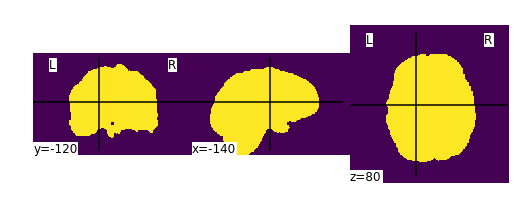

showing mask from given subset of dataset
93
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0098/VSD.Brain.XX.O.MR_Flair.40815/VSD.Brain.XX.O.MR_Flair.40815.nii/mask.nii.gz
showing generated mask


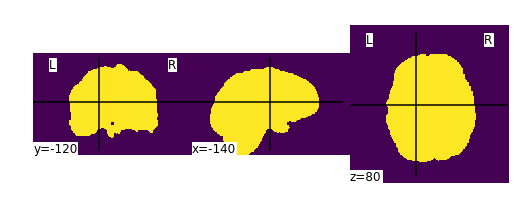

showing mask from given subset of dataset
94
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0152/VSD.Brain.XX.O.MR_Flair.41194/VSD.Brain.XX.O.MR_Flair.41194.nii/mask.nii.gz
showing generated mask


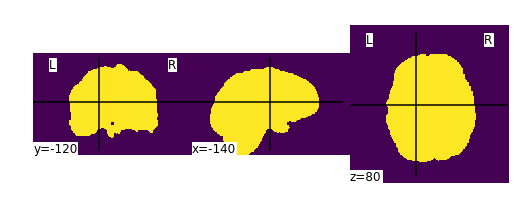

showing mask from given subset of dataset
95
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0206/VSD.Brain.XX.O.MR_Flair.41186/VSD.Brain.XX.O.MR_Flair.41186.nii/mask.nii.gz
showing generated mask


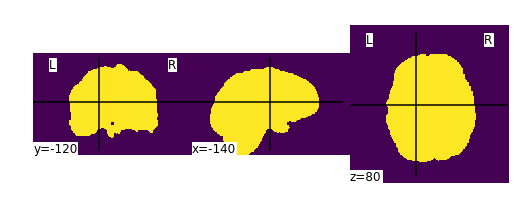

showing mask from given subset of dataset
96
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0268/VSD.Brain.XX.O.MR_Flair.41190/VSD.Brain.XX.O.MR_Flair.41190.nii/mask.nii.gz
showing generated mask


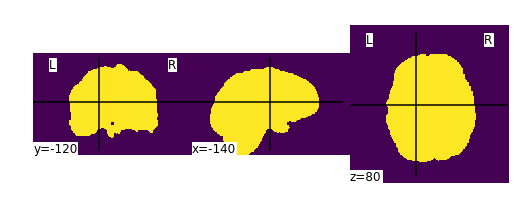

showing mask from given subset of dataset
97
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0334/VSD.Brain.XX.O.MR_Flair.41218/VSD.Brain.XX.O.MR_Flair.41218.nii/mask.nii.gz
showing generated mask


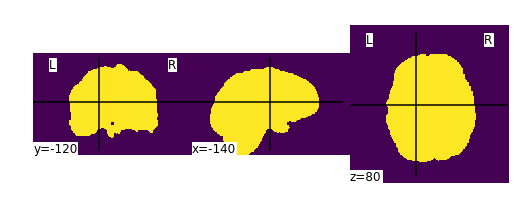

showing mask from given subset of dataset
98
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0403/VSD.Brain.XX.O.MR_Flair.41226/VSD.Brain.XX.O.MR_Flair.41226.nii/mask.nii.gz
showing generated mask


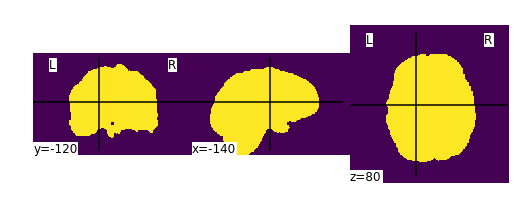

showing mask from given subset of dataset
99
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0465/VSD.Brain.XX.O.MR_Flair.41214/VSD.Brain.XX.O.MR_Flair.41214.nii/mask.nii.gz
showing generated mask


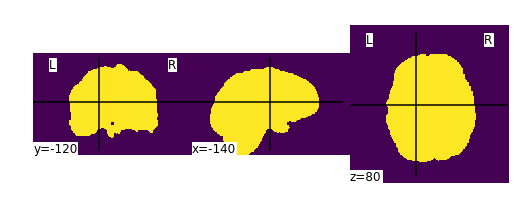

showing mask from given subset of dataset
100
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0525/VSD.Brain.XX.O.MR_Flair.41159/VSD.Brain.XX.O.MR_Flair.41159.nii/mask.nii.gz
showing generated mask


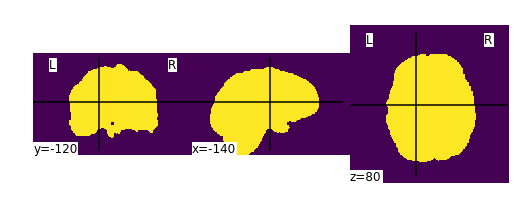

showing mask from given subset of dataset
101
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0552/VSD.Brain.XX.O.MR_Flair.41206/VSD.Brain.XX.O.MR_Flair.41206.nii/mask.nii.gz
showing generated mask


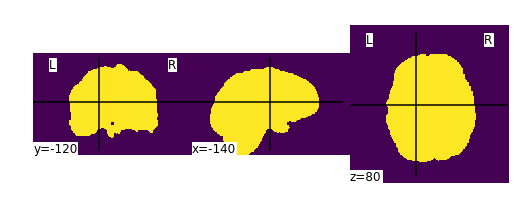

showing mask from given subset of dataset
102
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0592/VSD.Brain.XX.O.MR_Flair.41222/VSD.Brain.XX.O.MR_Flair.41222.nii/mask.nii.gz
showing generated mask


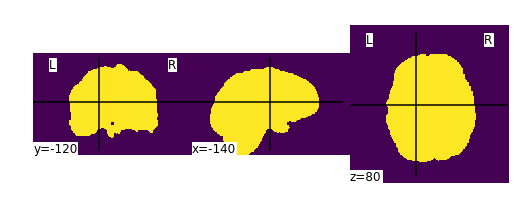

showing mask from given subset of dataset
103
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0613/VSD.Brain.XX.O.MR_Flair.41171/VSD.Brain.XX.O.MR_Flair.41171.nii/mask.nii.gz
showing generated mask


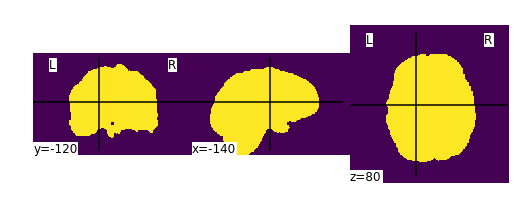

showing mask from given subset of dataset
104
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0647/VSD.Brain.XX.O.MR_Flair.41163/VSD.Brain.XX.O.MR_Flair.41163.nii/mask.nii.gz
showing generated mask


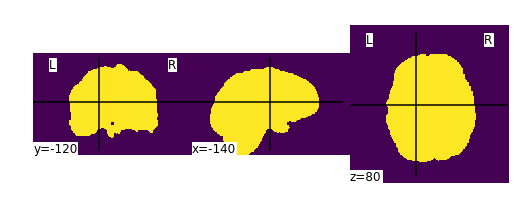

showing mask from given subset of dataset
105
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0716/VSD.Brain.XX.O.MR_Flair.41182/VSD.Brain.XX.O.MR_Flair.41182.nii/mask.nii.gz
showing generated mask


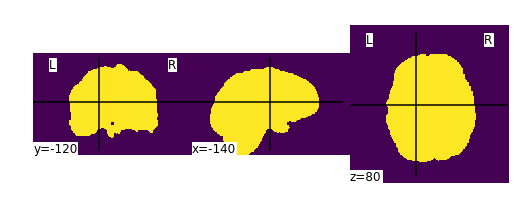

showing mask from given subset of dataset
106
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0771/VSD.Brain.XX.O.MR_Flair.40799/VSD.Brain.XX.O.MR_Flair.40799.nii/mask.nii.gz
showing generated mask


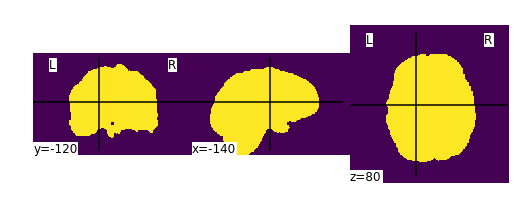

showing mask from given subset of dataset
107
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0832/VSD.Brain.XX.O.MR_Flair.41198/VSD.Brain.XX.O.MR_Flair.41198.nii/mask.nii.gz
showing generated mask


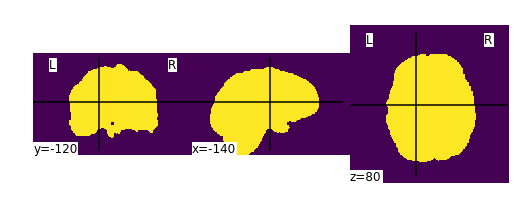

showing mask from given subset of dataset
108
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0852/VSD.Brain.XX.O.MR_Flair.41202/VSD.Brain.XX.O.MR_Flair.41202.nii/mask.nii.gz
showing generated mask


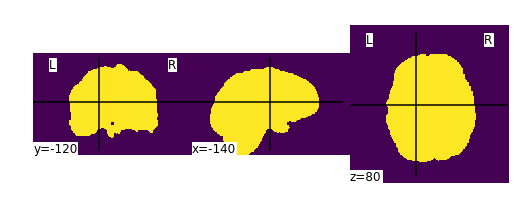

showing mask from given subset of dataset
109
/data2/brats2015_converted/Testing/HGG_LGG/brats_tcia_pat500_0867/VSD.Brain.XX.O.MR_Flair.41175/VSD.Brain.XX.O.MR_Flair.41175.nii/mask.nii.gz
showing generated mask


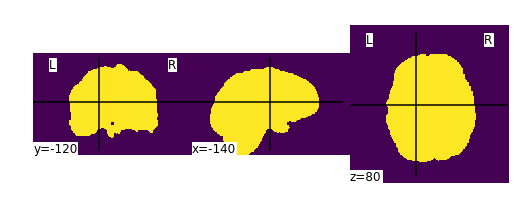

showing mask from given subset of dataset
DONE


/home/arissa/miniconda3/envs/brats/lib/python3.6/site-packages/ipykernel_launcher.py:55: ResourceWarning: unclosed file <_io.TextIOWrapper name='test_brats2015nii_list.txt' mode='r' encoding='UTF-8'>


In [49]:
cut_coords = (-140, -120, 80)
def original_code_generate_masks_on_full_dataset(skip=5):
    testf = open('test_brats2015nii_list.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/skip)):
        print(i)
        direct,_ = test_dir[skip*i].split("\n")    
        # read the images and ground truth
#         images0 = nib.load(direct).get_data()
        images0 = nib.load(direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[skip*i + 1].split("\n")    
        # read the images and ground truth
#         images1 = nib.load(direct1).get_data()
        images1 = nib.load(direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[skip*i + 2].split("\n")    
        # read the images and ground truth
#         images2 = nib.load(direct2).get_data()
        images2 = nib.load(direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[skip*i + 3].split("\n")    
        # read the images and ground truth
#         images3 = nib.load(direct3).get_data()
        images3 = nib.load(direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask.nii.gz")
        print(direct + "/mask.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
        try:
            print("showing mask from given subset of dataset")
            example_mask = "./" + direct[46:] + "/mask.nii.gz"
#             print(example_mask)
            plotting.plot_img(example_mask, cut_coords=cut_coords)
            plotting.show()
        except:
            pass
#         break
    print("DONE")
original_code_generate_masks_on_full_dataset(skip=4)

In [ ]:


# testf = open('test.txt', 'r')
# test_dir = testf.readlines()

# for i in range(int(len(test_dir))):
#     i = i + 1
#     print("image" + str(i))
	
#     if i % 5 == 4:
#         continue

#     direct_mask,_ = test_dir[5 * int(i/5)].split("\n")    
#     direct_image,_ = test_dir[i].split("\n")    
#     direct_mask = direct_mask + "/mask.nii.gz"
#     direct_image = direct_image +".gz"
    
#     pathToMainFolderWithSubjects = "./HGG/"
#     subjectsToProcess = os.listdir(pathToMainFolderWithSubjects)
#     subjectsToProcess.sort()
 
#     saveOutput = True
#     prefixToAddToOutp = "_zNorm2StdsMu"
     
#     dtypeToSaveOutput = "float32"
#     saveNormalizationPlots = True
         

#     lowHighCutoffPercentile = [5., 95.]
#     lowHighCutoffTimesTheStd = [3., 3.]
#     cutoffAtWholeImgMean = True 
# #     pdb.set_trace()
#     path = "/data2/arissa/Autofocus-Layer/data_preprocessing/data_normalization/generate_normal.py"
#     normalizationModule.do_normalization( __file__,
# 				pathToMainFolderWithSubjects,
# 				subjectsToProcess,
# 				direct_image,direct_mask,				
# 				saveOutput,
# 				prefixToAddToOutp,				
# 				dtypeToSaveOutput,
# 				saveNormalizationPlots,								
# 				lowHighCutoffPercentile, # Can be None
# 				lowHighCutoffTimesTheStd, # Can be None
# 				cutoffAtWholeImgMean,
# 				)



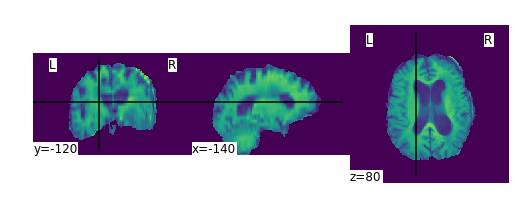

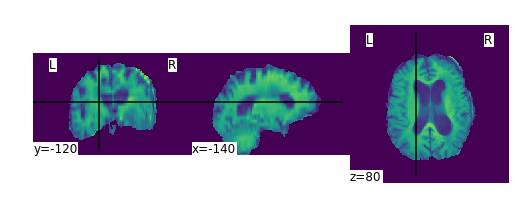

In [16]:
def view_normalized():
    impath = "/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898.nii.gz"
    normalized_path = "/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898_normalized.nii.gz"
    plotting.plot_img(impath, cut_coords=cut_coords)
    plotting.show()

    plotting.plot_img(normalized_path, cut_coords=cut_coords)
    plotting.show()
# view_normalized()
    

In [50]:
def write_files_to_list_nii_normalized():
#     skip = 5
    nii_f = open('test_brats2015nii_list.txt', 'r')
    nii_files = nii_f.readlines()
    nii_f.close()
#     assert len(nii_files) == 1100 + 270
    
    nii_normalized_f = open('test_brats2015_nii_normalized_list.txt', 'w')
    count = 0
    for i in range(len(nii_files)):
        new_filepath = nii_files[i].split("\n")[0]
        if True:#i % skip != skip - 1:
            new_filepath = new_filepath[:-4] + "_normalized.nii"
            print(new_filepath)
        nii_normalized_f.write(new_filepath + "\n")
#         print(mha_files[i])
        count += 1
#     assert count == 1100 + 270
    nii_f.close()
    print("Done")
write_files_to_list_nii_normalized()

/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_Flair.54193/VSD.Brain.XX.O.MR_Flair.54193_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1.54194/VSD.Brain.XX.O.MR_T1.54194_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T1c.54195/VSD.Brain.XX.O.MR_T1c.54195_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0103_1/VSD.Brain.XX.O.MR_T2.54196/VSD.Brain.XX.O.MR_T2.54196_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_Flair.54199/VSD.Brain.XX.O.MR_Flair.54199_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1.54200/VSD.Brain.XX.O.MR_T1.54200_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013_pat0105_1/VSD.Brain.XX.O.MR_T1c.54201/VSD.Brain.XX.O.MR_T1c.54201_normalized.nii
/data2/brats2015_converted/Testing/HGG_LGG/brats_2013

/home/arissa/miniconda3/envs/brats/lib/python3.6/site-packages/ipykernel_launcher.py:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='test_brats2015_nii_normalized_list.txt' mode='w' encoding='UTF-8'>
